# Od neuronu do perceptronu

# Neuron biologiczny


Sposób działania sztucznego neuronu czerpie swoją inspirację z neuronu biologicznego. Biologiczny neuron to komórka, która odbiera, generuje i przekazuje impulsy.	
		
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/08/Neuron%2C_LangNeutral.svg/1024px-Neuron%2C_LangNeutral.svg.png" style="height:300px;">

(źródło: https://pl.wikipedia.org/wiki/Neuron)

Schemat budowy neuronu: 

- **a – dendryty** (ang. dendrite), 
- **b – ciało komórki (inaczej perikarion, soma lub neurocyt)** (ang. soma, cell body), 
- **c – jądro komórkowe** (ang. nucleus), 
- **d – akson** (ang. axon),
- **h – zakończenia aksonu z synapsami** (ang. synapses)



Działa to tak: dendryty, czyli wypustki neuronu, odbierają impulsy od innych neuronów lub od receptorów zmysłów. Gdy suma impulsów osiągnie pewien próg (w ciele komórki), neuron generuje impuls elektryczny, który przemieszcza się aksonem do innych komórek przez synapsy. 

Warto dodać, że gdy impuls elektryczny dociera do końca neuronu na granicę synapsy i "chce" przejść do innego neuronu napotyka wyzwanie: przerwę między neuronami, zwaną szczeliną synaptyczną, która nie przewodzi impulsu elektrycznego; w tym momencie w grę wchodzą substancje chemiczne zwane neurotransmiterami, które neuron wysyła do tej szczeliny; przemieszczają się one przez szczelinę synaptyczną i łączą się z receptorami na neuronie odbierającym i wówczas generowany jest nowy impuls elektryczny.

# Sztuczny neuron

## Iloczyn skalarny

Teraz, wyobraź sobie sztuczny neuron: ma coś na kształt dendrytów - są to liczby wejściowe.  Są one następnie, podobnie jak impulsy neuronu biologicznego, sumowane i przekazywane do specjalnej funkcji aktywacji, która decyduje jak silna będzie reakcja neuronu. Na przykład, taka funkcja aktywacji może określić próg, wartości 0.5, i jeśli suma impulsów przekroczy go, to zwracana jest wartość 1, co odpowiada powstaniu impulsu elektrycznego w neuronie biologicznym, albo 0, co oznaczałoby brak impulsu.

Warto dodać, że podobnie jak neuron biologiczny nie traktuje wszystkich dendrytów tak samo "poważnie", tzn. impulsy od jednych dendrytów traktuje jako ważniejsze niż od innych, sztuczny neuron również waży swoje dane wejściowe. To ważenie w praktyce polega na przemnożeniu impulsu przez ułamek, co skutkuje zmniejszeniem wartości takiego sygnału. Na przykład przemnażając sygnał o wartości 1 przez 0.5 otrzymamy 0.5, czyli wartość sygnału zmniejszyła się o połowę.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/ac/Neuron3.svg/1024px-Neuron3.svg.png" style="height:300px;">

(źródło: https://en.wikipedia.org/wiki/Artificial_neuron)

Sygnały są oznaczone jako $x_i$, gdzie i jest referencyjną liczbą całkowitą. Zbiór wszystkich sygnałów dla danego przykładu jest oznaczony wektorem $\boldsymbol{x}$:

- $\boldsymbol{x} = [x_0, x_1, ..., x_i, ..., x_n]$

I podobnie, wagi skojarzone dla każdego obiektu będą oznaczone jako $w_i$, gdzie $i$ odpowiada indeksowi sygnału $x$ związanemu z tą wagą. Wagi są reprezentowane przez wektor \boldsymbol{w}:

- $\boldsymbol{w} = [w_0, w_1, ..., w_i, ..., w_n]$

Mając cechy wystarczy pomnożyć każdą cechę ($x_i$) przez odpowiadającą jej waga ($w_i$), a następnie zsumować. W taki sposób otrzymamy sumę ważonych sygnałów. Z matematycznego punktu widzenia to **iloczyn skalarny (ang. dot product)** oznaczony jak następuje: $\boldsymbol{x} \cdot \boldsymbol{w}$. Czyli:

$ \boldsymbol{x} \cdot \boldsymbol{w} = (x_0 * w_0) + (x_1 * w_1) + (x_2 * w_2) + ... + (x_i * w_i) + ... + (x_n * w_n)$

Inny znany zapis:

$\sum_{j=0}^{n} x_j * w_j$




## Przesunięcie (ang. bias)

Można potraktować przesunięcie (ang. bias) jako dodatkowy, stały sygnał $x_{n+1} = 1$, który powiększy rozmiar wektora sygnałów. Oczywiście przemnażając go przez dodatkową wagę $w_{n+1}$ otrzymamy $w_{n+1}$. W pkraktyce jednak traktuje się go osobno. 

Najłatwiej jest go zrozumieć jako stałą `b` w równaniu liniowym postaci:

$y = ax + b$

Porównaj na stronie https://www.desmos.com/calculator jak wyglądają wykresy równań:
- $y = 3x$
- $y = 3x + 2$

W obu równaniach `a = 3`. Ten parametr odpowiada za kąt nachylenia wykresu do osi poziomej (x-ów).
Jak widzisz, w drugim równaniu bias/przesunięcie `b = 2`. Pozwala on na przesunięcie wykresuw górę i w dół. Bez niego (tzn. gdy `b = 0`) wszystkie wykresy musiałyby przecineć punkt `(0,0)`, co ograniczało by znacznie nasze możliwości. Ponież okaże się jasne dlaczego to takie istotne. 

Sztuczny neuron będzie zawsze posiadał `bias` jako dodatkowy parametr dodany do iloczynu sklalarnego wektorów.


## Próg (aktywacji)

Elementem, którego nam jeszcze brakuje, jest próg "aktywacji" neuronu (ang. threshold). Gdy suma przekroczy pewien próg, perceptron zwraca 1, w przeciwnym razie - 0.

Ten próg można przedstawić za pomocą prostej funkcji skokowej:

\begin{align}
f(\sum_{j=0}^{n} x_j * w_j + b) = \left\{ \begin{array}{cc} 
                1 & \hspace{5mm} \sum_{j=0}^{n} x_j * w_j + b\geq threshold \\
                0 & \hspace{5mm} \sum_{j=0}^{n} x_j * w_j + b<threshold \\
                \end{array} \right.
\end{align}

# Pythonowy neuron - intuicje

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import random

## Od sygnałów do aktywacji

Załóżmy, że nasz sztuczny neuron ma dwa dendryty i aktualnie odbiera dwa sygnały:

In [2]:
# 2 inputs (vector)
x = [2, 3]

# 2 weights (vector)
w = [0.1, 0.2]

# bias (scalar)
b = 0.1 

In [3]:
# dot_product = x . w = 2 * 0.1 + 3 * 0.2 = 0.2 + 0.6 = 0.8
# weighted_sum = 0.8 + 0.1 = 0.9

def weighted_sum(x, w, b):
    dot_product = 0 
    for inp, weight in zip(x, w):
        dot_product += inp * weight

    return dot_product + b   

print(f'Ważona suma impulsów = {weighted_sum(x, w, b)}')

Ważona suma impulsów = 0.9


In [4]:
def neuron_output(weighted_sum, threshold = 0.5):
    if weighted_sum >= threshold:
        return 1
    else:
        return 0

perceptron_output = neuron_output(weighted_sum(x, w, b))   

print(f'perceptron_output = {perceptron_output}')

perceptron_output = 1


## Aktualizacja wag

Każda waga jest dostosowywana w zależności od tego, jak bardzo przyczyniła się do powstałego błędu. Większa waga (która pozwala punktowi danych bardziej wpływać na wynik) powinna być bardziej obwiniana za poprawność/błędność wyjścia perceptronu dla danego wejścia.

| `expected_output` | `perceptron_output` | `update`     |
|:-----------------:|:-------------------:|:------------:|
| `1`               | `0`                 | `1 - 0 =  1` |
| `0`               | `1`                 | `0 - 1 = -1` |


Każdą wagę `w_j` wektora (listy) `w` będziemy musieli zmienić (tj. zwiększyć lub zmniejszyć) o wartość `update * x_j`, czyli wartość proporcjonalną do wielkoci sygnału.

Podobnie zmienimy `b` o wartość `update`.

In [5]:
expected_output = 0

update = expected_output - perceptron_output

new_w = []
new_b = 0
for inp, weight in zip(x, w):
    weight += update * inp
    new_w.append(weight)
    
new_b += b + update
    
print(f'new_w = {new_w}\nnew_b = {new_b}')    

new_w = [-1.9, -2.8]
new_b = -0.9


In [6]:
print(f'perceptron_output = {neuron_output(weighted_sum(x, new_w, new_b))}')

perceptron_output = 0


# Pythonowy perceptron z NumPy

## NumPy (Numerical Python)

NumPy (Numerical Python) to popularna biblioteka Pythona, wykorzystywana głównie do obliczeń numerycznych. Jest kluczowym elementem ekosystemu naukowego Pythona, służąc jako fundament do bardziej zaawansowanych bibliotek, takich jak `SciPy`, `pandas` czy `scikit-learn`. Oto krótkie wprowadzenie do najważniejszych aspektów NumPy:

### Kluczowe cechy NumPy:
1. **Tablice N-wymiarowe**:
   - Główną strukturą danych w NumPy jest tablica N-wymiarowa (`np.array`), która umożliwia pracę z wielowymiarowymi zestawami danych. Jest to wydajna, homogeniczna struktura, która umożliwia szybkie operacje matematyczne.

2. **Funkcje matematyczne i statystyczne, algebra Liniowa**:
   - NumPy oferuje szereg wbudowanych funkcji, takich jak sumowanie, uśrednianie, sortowanie, czy funkcje trygonometryczne i logarytmiczne.
   - Biblioteka zawiera narzędzia do pracy z macierzami, w tym operacje macierzowe, rozkłady, znajdowanie wartości własnych czy rozwiązywanie układów równań liniowych.

3. **Wydajność**:
   - Operacje na tablicach NumPy są zoptymalizowane pod kątem wydajności, dzięki czemu przewyższają typowe struktury Pythona, takie jak listy, w obliczeniach numerycznych.

4. **Interoperacyjność**:
   - NumPy świetnie współpracuje z innymi bibliotekami Pythona. Wiele narzędzi do analizy danych korzysta z tablic NumPy jako podstawowej struktury danych.




### Skalary, wektory, macierze, tensory

Tablica `np.array` w bibliotece NumPy koresponduje z różnymi strukturami matematycznymi, w zależności od wymiarowości i kontekstu użycia. 

**Główne atrybuty tablic**

- liczba osi (ranga) - atrybut `ndim`
- kształt - atrybut `shape`
- typ danych - atrybut `dtype`

Podstawowe struktury matematyczne, które można reprezentować za pomocą `np.array`:

1. **Skalary**:
   - **0-wymiarowa tablica**: `np.array` może reprezentować skalar, czyli liczbę.
   - **Przykład**: `skalar = np.array(12)`

In [7]:
x = np.array(12)
print(f'x.ndim = {x.ndim}\nx.shape = {x.shape}')

x.ndim = 0
x.shape = ()


2. **Wektory**:
   - **Jednowymiarowa tablica**: `np.array` może reprezentować wektor, czyli uporządkowaną listę liczb, która matematycznie jest pojęciem znanym z algebry liniowej. Wektor może być interpretowany jako punkt w przestrzeni n-wymiarowej lub jako kierunek i długość w tej przestrzeni.
   - **Przykład**: `vector = np.array([1, 2, 3])`

In [8]:
x = np.array([1, 2, 3])
print(f'x.ndim = {x.ndim}\nx.shape = {x.shape}')

x.ndim = 1
x.shape = (3,)


3. **Macierze**:
   - **Dwuwymiarowa tablica**: `np.array` może służyć do reprezentacji macierzy, która jest prostokątną tablicą liczb, symboli lub wyrażeń ułożonych w wiersze i kolumny. Macierze są kluczowe w algebrze liniowej, gdzie są używane do przedstawienia przekształceń liniowych i rozwiązywania systemów równań liniowych.
   - **Przykład**: `matrix = np.array([[1, 2, 3], [4, 5, 6]])`


In [9]:
x = np.array([[1, 2, 3], [4, 5, 6]])
print(f'x.ndim = {x.ndim}\nx.shape = {x.shape}')

x.ndim = 2
x.shape = (2, 3)


4. **Tensory wyższych rzędów**:
   - **Wielowymiarowa tablica**: W ogólnym przypadku, `np.array` może reprezentować tensory, które są uogólnieniem wektorów i macierzy na wyższe wymiary. Tensory znajdują zastosowanie w wielu dziedzinach nauki, w tym w fizyce i inżynierii, gdzie mogą opisywać złożone relacje między zestawami zmiennych.
   - **Przykład**: `tensor = np.array([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])`

In [10]:
x = np.array([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])
print(f'x.ndim = {x.ndim}\nx.shape = {x.shape}')

x.ndim = 3
x.shape = (2, 2, 2)


## Perceptron NumPy

## Perceptron jako jednowarstwowa sieć neuronowa

Nasza sieć, perceptron, będzie uczyć się alternatywy czyli `or`.

In [11]:
# OR
X = [[0, 0, 1, 1],
     [0, 1, 0, 1]]

y = [[0, 1, 1, 1]]

X = np.array(X)
Y = np.array(y)

print("X.shape =", X.shape)
print("Y.shape =", Y.shape)

n_x = X.shape[0]
m = X.shape[1]

print("n_x =",n_x) # ile mamy sygnałów /cech
print("m =",m)     # ile mamy przykładów treningowych

X.shape = (2, 4)
Y.shape = (1, 4)
n_x = 2
m = 4


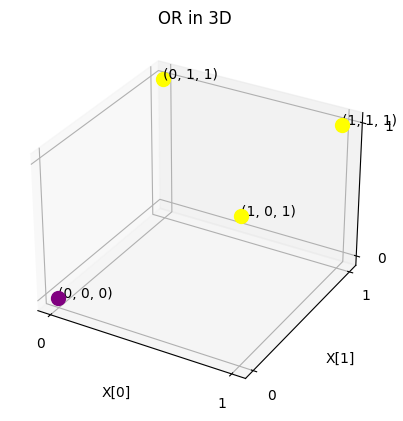

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot points based on X and Y data
for i in range(X.shape[1]):  # Loop through each column
    color = 'yellow' if Y[0, i] == 1 else 'purple'
    # Plot the point using determined Y value (either 1 or 0)
    ax.scatter(X[0, i], X[1, i], Y[0, i], color=color, s=100)
    # Annotate each point with its coordinate
    ax.text(X[0, i], X[1, i], Y[0, i], f'({X[0, i]}, {X[1, i]}, {Y[0, i]})', color='black')

# Set labels and plot title
ax.set_xlabel('X[0]')
ax.set_ylabel('X[1]')
ax.set_zlabel('Y')
ax.set_title('OR in 3D')

# Setting the tick labels for clarity
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_zticks([0, 1])

plt.show()

Jak spojrzymy z góry to zobaczymy:

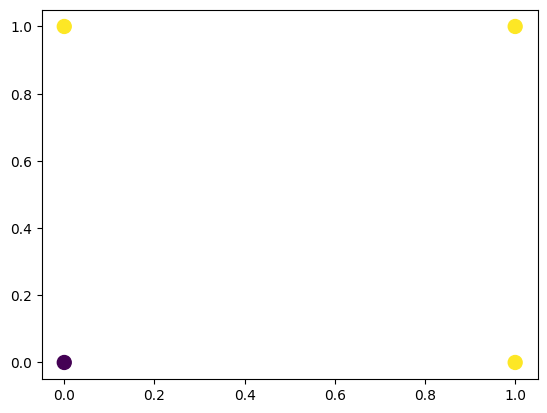

In [13]:
# Visualize the data:
plt.scatter(X[0, :], X[1, :], marker='o', c = Y.T, s=100);

### Inicjalizacja parametrów

In [14]:
def initialize_parameters(n_x):
    """
    Implements the initialization of parameters

    Arguments:
    n_x -- number of signals/features

    Returns:
    weights - array of weights of shape (n_x, 1)
    bias -- bias (scalar)
    """     
    
    weights = np.random.rand(n_x,1)* 0.001  # Small random float 0 < w < .001
    bias = 0
    
    assert(weights.shape == (n_x, 1))
    
    return weights, bias

In [15]:
weights, bias = initialize_parameters(n_x)
print(f'weights: {weights}, \nbias: {bias}')

weights: [[0.00042349]
 [0.0005849 ]], 
bias: 0


In [16]:
print("X.shape =", X.shape)
print("weights.shape =", weights.shape)


X.shape = (2, 4)
weights.shape = (2, 1)


### Propagacja do przodu (*ang. forward propagation*)

Propagacja do przodu:
- Masz `X`
- Obliczasz ważoną sumę dla zbioru danych `X`, wag `weights` oraz `bias`  
    - `Z = weights.T * X + bias`

In [17]:
def weighted_sum(weights, bias, X):
    """
    Calculates the weighted sum.

    Arguments:
    weights -- weights matrix: numpy array of shape (n_x, 1)
    bias -- bias (scalar)
    X -- input data

    Returns:
    Z -- weighted sum of shape (weights.shape[1], X.shape[1])
    """    
       
    Z = np.dot(weights.T, X) + bias
    
    assert(Z.shape == (weights.T.shape[0], X.shape[1]))

    return Z

In [18]:
Z = weighted_sum(weights, bias, X)
print(f'weighted sum Z = {Z}')

weighted sum Z = [[0.         0.0005849  0.00042349 0.00100839]]


In [19]:
print("Z.shape =", Z.shape)

Z.shape = (1, 4)


In [20]:
def step_function(Z, threshold = 0.5):
    """
    Implements step function that returns the perceptron's prediction 

    Arguments:
    Z -- weighted sum
    threshold -- threshold; it is set 0.5 by default

    Returns:
    prediction -- network prediction of the same shape as Z
    
    """       
        
    prediction = np.where(Z > threshold, 1, 0)
    
    assert(prediction.shape == Z.shape)

    
    return prediction

In [21]:
print('step_function =', step_function(Z))

step_function = [[0 0 0 0]]


In [22]:
def update_function(Z, Y):
    """
    Implements update

    Arguments:
    Z -- weighted sum
    Y -- labels

    Returns:
    update -- updates to weights and bias of the same shape as Z
    
    """      
    update = Y-step_function(Z)
    
    assert(update.shape == Y.shape)
    
    return update

In [23]:
update = update_function(Z,Y)
print("update =", update)
print("update.shape =",update.shape)

update = [[0 1 1 1]]
update.shape = (1, 4)


In [24]:
def update(weights, bias, X, Y, number_iterations):
    
    """
    Implements update od weights and bias

    Arguments:
    weights -- weights matrix: numpy array of shape (n_x, 1)
    bias -- bias (scalar)
    X -- input data
    Y -- labels
    number_iterations -- number of iterations/epoches

    Returns:
    updated values of weights and bias
    
    """      
    
    m = X.shape[1]
    
    for i in range(number_iterations):
        Z = weighted_sum(weights, bias, X)
        update = update_function(Z,Y)
        
        correct_answers = np.sum(step_function(Z) == Y)
#         print("epoche",i+1,"| update =", update, "| accuracy =", 
#               (correct_answers / m) * 100, '%')
        print("epoche",i+1,"| accuracy =", 
              (correct_answers / m) * 100, '%')
        
        weights += np.dot(X, update.T) # weights = weights + ...
        bias += np.sum(update)
        
    return weights, bias

In [25]:
new_weights, new_bias = update(weights, bias, X, Y, number_iterations=5)

epoche 1 | accuracy = 25.0 %
epoche 2 | accuracy = 75.0 %
epoche 3 | accuracy = 75.0 %
epoche 4 | accuracy = 75.0 %
epoche 5 | accuracy = 100.0 %


In [26]:
def perceptron_model(X, Y, number_iterations = 10):
    """
    Implement 

    Arguments:
    X -- input data
    Y -- labels
    number_iterations -- number of iterations/epoches

    Returns:
    updated values of weights and bias
    
    """     
    
    n_x = X.shape[0]
    m = X.shape[1]
    
    weights, bias = initialize_parameters(n_x)
    
    final_weights, final_bias = update(weights, bias, X, Y, number_iterations)
    
    Z = weighted_sum(final_weights, final_bias, X)
    
    Y_prediction = step_function(Z)
    
    print("train accuracy: {} %".format((np.sum(Y_prediction == Y)/m)*100))
    
    d = {"Y_prediction" : Y_prediction, 
         "w" : final_weights, 
         "b" : final_bias}
    
    return d

In [27]:
d = perceptron_model(X, Y, number_iterations = 10)

epoche 1 | accuracy = 25.0 %
epoche 2 | accuracy = 75.0 %
epoche 3 | accuracy = 75.0 %
epoche 4 | accuracy = 75.0 %
epoche 5 | accuracy = 100.0 %
epoche 6 | accuracy = 100.0 %
epoche 7 | accuracy = 100.0 %
epoche 8 | accuracy = 100.0 %
epoche 9 | accuracy = 100.0 %
epoche 10 | accuracy = 100.0 %
train accuracy: 100.0 %


In [28]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.02
    
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], marker='o', c = y.T, s=120)

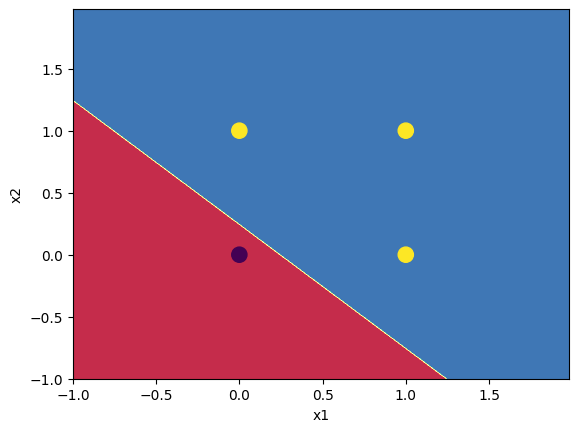

In [29]:
# Plot the decision boundary
plot_decision_boundary(lambda x: step_function(weighted_sum(d["w"], d["b"], x.T)), X, Y)

In [30]:
# AND
X = [[0, 0, 1, 1],
     [0, 1, 0, 1]]

y = [[0, 0, 0, 1]]

X = np.array(X)
Y = np.array(y)

d = perceptron_model(X, Y, number_iterations = 10)

epoche 1 | accuracy = 75.0 %
epoche 2 | accuracy = 25.0 %
epoche 3 | accuracy = 75.0 %
epoche 4 | accuracy = 100.0 %
epoche 5 | accuracy = 100.0 %
epoche 6 | accuracy = 100.0 %
epoche 7 | accuracy = 100.0 %
epoche 8 | accuracy = 100.0 %
epoche 9 | accuracy = 100.0 %
epoche 10 | accuracy = 100.0 %
train accuracy: 100.0 %


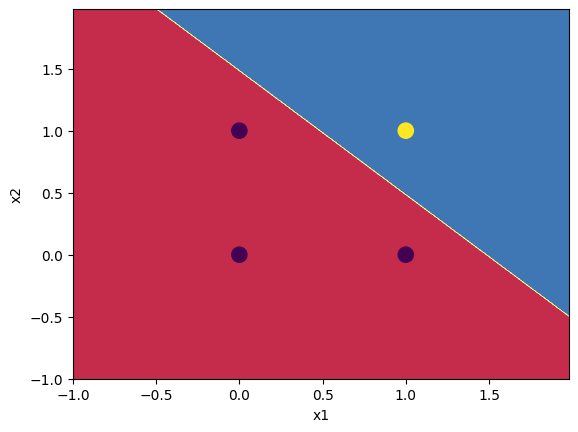

In [31]:
plot_decision_boundary(lambda x: step_function(weighted_sum(d["w"], d["b"], x.T)), X, Y)

### Alternatywa rozłączna (XOR)


<!-- <img src="perceptron_img/or-and-xor.png" style="height:500px;">
(źródło: http://www.cs.stir.ac.uk/courses/ITNP4B/lectures/kms/2-Perceptrons.pdf)
 -->
Podstawowy perceptron ma "wrodzoną" wadę. Jeśli danych nie można rozdzielić liniowo lub związku między danymi nie można opisać za pomocą zależności liniowej, model nie znajdzie minimum i nie będzie miał żadnej użytecznej mocy predykcyjnej. Nie będzie w stanie dokładnie przewidzywać.


In [32]:
# XOR
X = [[0, 0, 1, 1],
     [0, 1, 0, 1]]

y = [[0, 1, 1, 0]]

X = np.array(X)
Y = np.array(y)

d = perceptron_model(X, Y, number_iterations = 10)

epoche 1 | accuracy = 50.0 %
epoche 2 | accuracy = 50.0 %
epoche 3 | accuracy = 50.0 %
epoche 4 | accuracy = 50.0 %
epoche 5 | accuracy = 50.0 %
epoche 6 | accuracy = 50.0 %
epoche 7 | accuracy = 50.0 %
epoche 8 | accuracy = 50.0 %
epoche 9 | accuracy = 50.0 %
epoche 10 | accuracy = 50.0 %
train accuracy: 50.0 %



**Minsky i Papert** (zob. Perceptrons, 1969) wykazali, że gdyby próbek danych nie można było rozdzielić liniowo na dyskretne grupy, perceptron nie byłby w stanie nauczyć się klasyfikować danych wejściowych.

Liniowo rozdzielane punkty danych (zob. OR i AND) nie stanowią problemu dla perceptronu. Dane jak dla XOR spowodują, że perceptron pojedynczego neuronu będzie wiecznie kręcił w kółko, nie ucząc się przewidywać czegoś lepszego niż przypadkowe przypuszczenie. Nie jest możliwe narysowanie pojedynczej linii między dwiema klasami XOR. Perceptron nie może opisać równania nieliniowego ani związku nieliniowego.

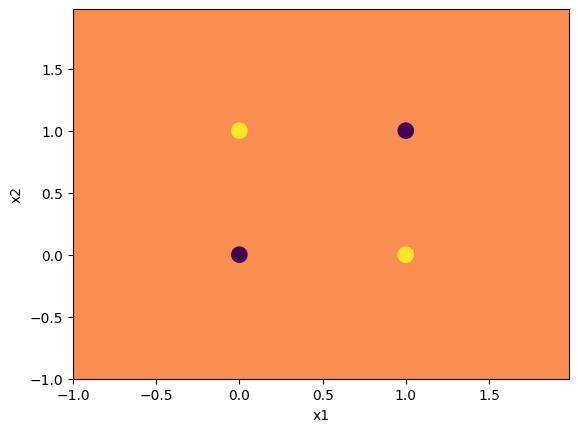

In [33]:
plot_decision_boundary(lambda x: step_function(weighted_sum(d["w"], d["b"], x.T)), X, Y)

# Iris

https://en.wikipedia.org/wiki/Iris_flower_data_set

Zbiór danych `iris.data`, znany jako Zbiór Danych Kwiatów Irysa, zawiera informacje o trzech gatunkach kwiatów irysów (Iris Setosa, Iris Versicolor i Iris Virginica). Każdy wiersz w zbiorze reprezentuje pojedynczą próbkę kwiatu. Dla każdej próbki dostępne są cztery cechy opisujące wymiary różnych części kwiatu oraz informacja o gatunku kwiatu.

### Opis Kolumn w `iris.data`:

1. **Długość Działki Kielicha**:
   - Długość działki kielicha (jedna z dwóch części okwiatu kwiatu), mierzona w centymetrach.

2. **Szerokość Działki Kielicha**:
   - Szerokość działki kielicha, mierzona w centymetrach.

3. **Długość Płatka**:
   - Długość płatka (część kwiatu, która często ma kolor i wydziela zapach), mierzona w centymetrach.

4. **Szerokość Płatka**:
   - Szerokość płatka, mierzona w centymetrach.

5. **Gatunek**:
   - Gatunek kwiatu irysa, wartość kategoryczna obejmująca trzy kategorie:
     - Iris Setosa
     - Iris Versicolor
     - Iris Virginica

### Zastosowanie Danych:
Ten zbiór danych jest często wykorzystywany w nauce o danych, uczeniu maszynowym i eksploracji danych do testowania algorytmów klasyfikacji, ponieważ umożliwia kategoryzację kwiatów na gatunki na podstawie wymiarów ich części botanicznych. Stanowi doskonały przykład danych wielowymiarowych z jasno określonymi kategoriami, które można łatwo wizualizować, a także jest przydatny do demonstrowania skuteczności algorytmów klasyfikacji.

In [34]:
# !pip install requests
import requests

# URL of the Iris dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Write the content of the response to a local file
    with open('iris.data', 'w') as f:
        f.write(response.text)
    print("File downloaded successfully!")
else:
    print("Failed to retrieve the file. Status code:", response.status_code)

File downloaded successfully!


In [35]:
df = pd.read_csv('iris.data', header=None, encoding='utf-8')
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [63]:
# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)
y = y.reshape((1,100))

# extract sepal length and petal length
X = df.iloc[0:100, [0, 1]].values
X = X.T

print("X.shape = ", X.shape)
print("y.shape = ", y.shape)

X.shape =  (2, 100)
y.shape =  (1, 100)


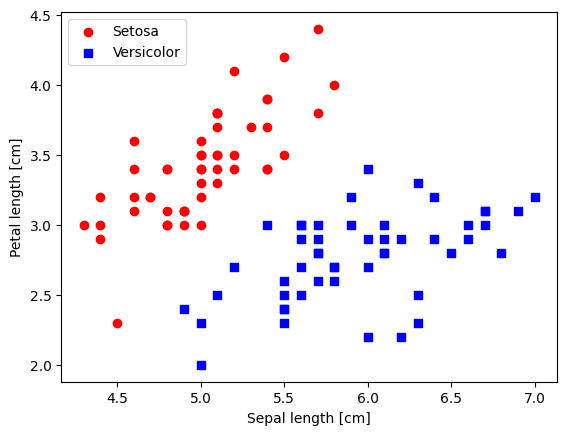

In [64]:
# plot data
plt.scatter(X[0,:50], X[1, :50], 
            color='red', marker='o', label='Setosa')
plt.scatter(X[0, 50:100], X[1, 50:100],
            color='blue', marker='s', label='Versicolor')

plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')

plt.show()

In [65]:
d = perceptron_model(X, y, number_iterations = 20)

epoche 1 | accuracy = 50.0 %
epoche 2 | accuracy = 50.0 %
epoche 3 | accuracy = 50.0 %
epoche 4 | accuracy = 50.0 %
epoche 5 | accuracy = 50.0 %
epoche 6 | accuracy = 50.0 %
epoche 7 | accuracy = 50.0 %
epoche 8 | accuracy = 50.0 %
epoche 9 | accuracy = 50.0 %
epoche 10 | accuracy = 50.0 %
epoche 11 | accuracy = 50.0 %
epoche 12 | accuracy = 50.0 %
epoche 13 | accuracy = 50.0 %
epoche 14 | accuracy = 50.0 %
epoche 15 | accuracy = 50.0 %
epoche 16 | accuracy = 50.0 %
epoche 17 | accuracy = 50.0 %
epoche 18 | accuracy = 50.0 %
epoche 19 | accuracy = 50.0 %
epoche 20 | accuracy = 50.0 %
train accuracy: 50.0 %


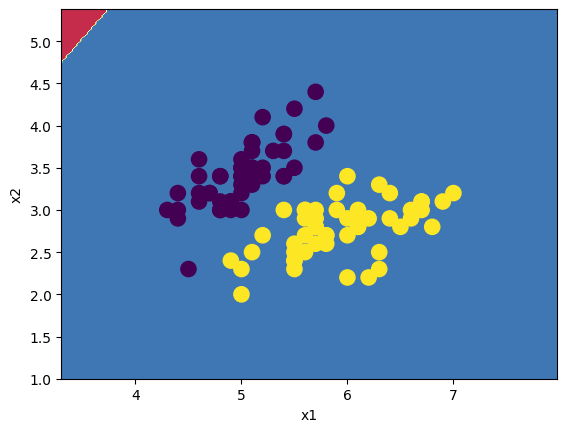

In [66]:
plot_decision_boundary(lambda x: step_function(weighted_sum(d["w"], d["b"], x.T)), X, y)

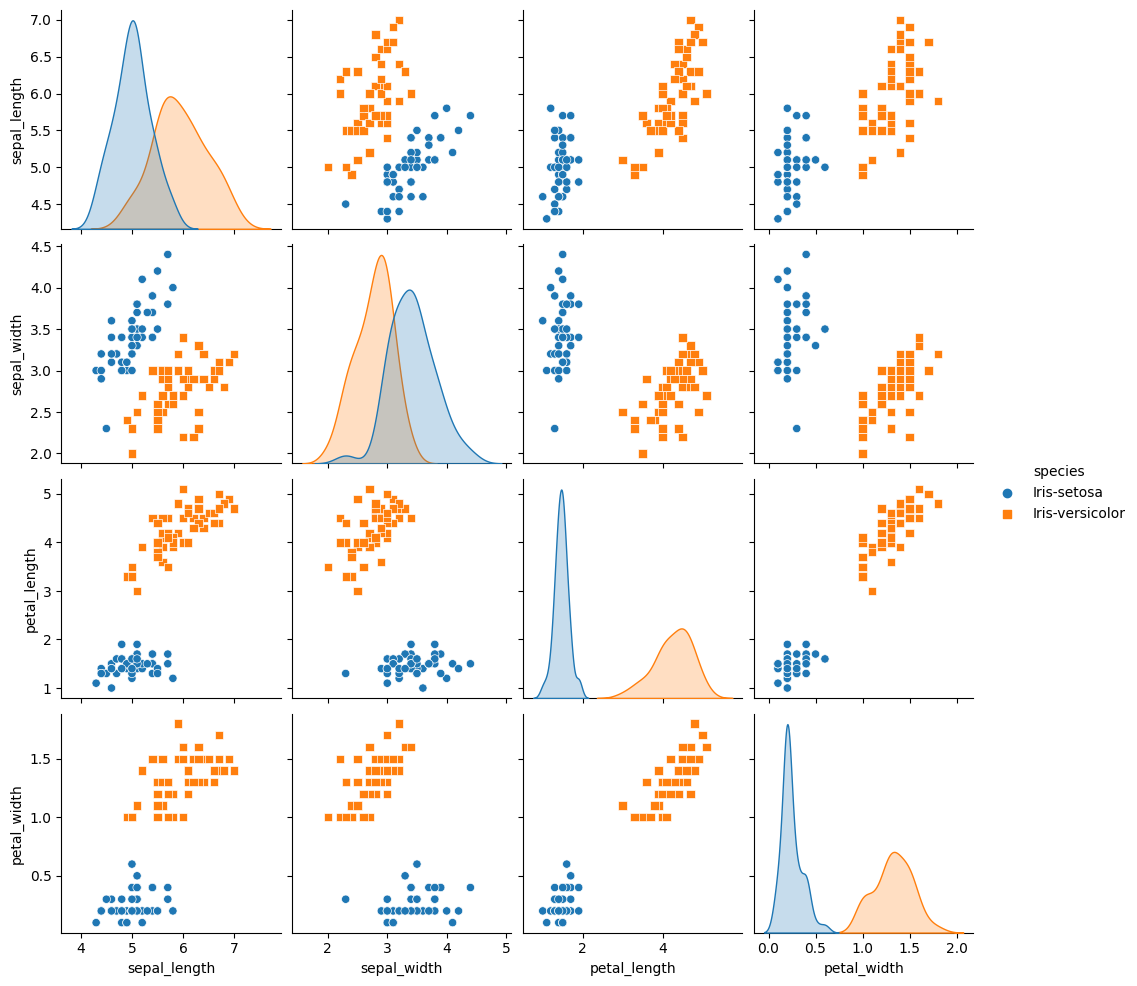

In [49]:
import seaborn as sns
import pandas as pd

# Define the column names for the Iris dataset
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Read the iris.data file into a pandas DataFrame
iris_df = pd.read_csv('iris.data', header=None, names=column_names)

# Filter only for Setosa and Versicolor
filtered_iris_df = iris_df[iris_df['species'].isin(['Iris-setosa', 'Iris-versicolor'])]

# Plot using seaborn pair plot
sns.pairplot(filtered_iris_df, hue='species', markers=['o', 's'])